# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string


In [3]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('Phishing_Email.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Cleaning and Preprocessing

In [4]:
def clean_text(text):
    # Convert to string if not already
    text = str(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

In [5]:
# Apply cleaning to email text
df['cleaned_text'] = df['Email Text'].apply(clean_text)

# Encode labels
df['label'] = df['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)

# Data Anaylsis

Class Distribution:
Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64


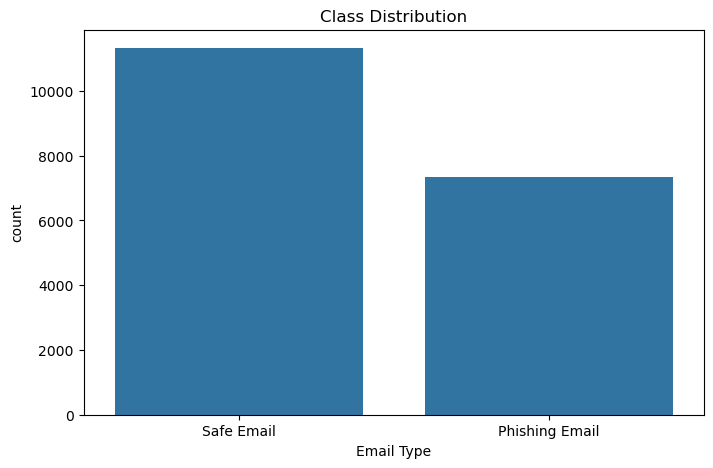

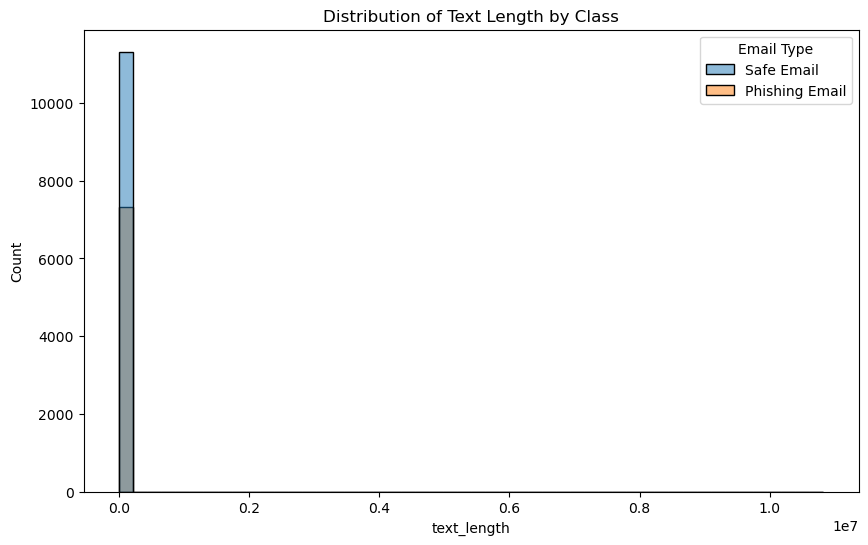

In [6]:
# Exploratory Data Analysis
print("Class Distribution:")
print(df['Email Type'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='Email Type', data=df)
plt.title('Class Distribution')
plt.show()

# Text Length Analysis
df['text_length'] = df['cleaned_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='Email Type', bins=50)
plt.title('Distribution of Text Length by Class')
plt.show()


# Data Preparation for Modeling

In [7]:

# Prepare data for modeling
X = df['cleaned_text']
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ML Models Building and Performance Anaylsis

In [8]:
# Dictionary to store model performance
model_performance = {}

In [9]:
# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_tfidf, y_train)
y_pred = dt.predict(X_test_tfidf)
model_performance['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred)
}



In [10]:
# 2. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)
model_performance['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred)
}



In [11]:
# 3. SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf, y_train)
y_pred = svm.predict(X_test_tfidf)
model_performance['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred)
}



In [12]:
# 4. Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)
model_performance['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred)
}


Decision Tree Performance:
Accuracy: 0.9153
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2264
           1       0.88      0.91      0.89      1466

    accuracy                           0.92      3730
   macro avg       0.91      0.91      0.91      3730
weighted avg       0.92      0.92      0.92      3730



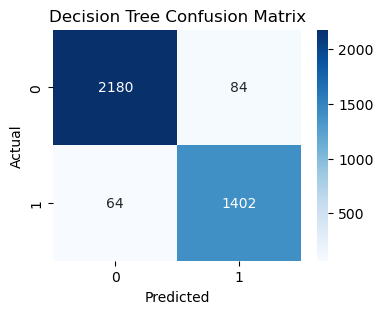


Random Forest Performance:
Accuracy: 0.9571
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2264
           1       0.93      0.96      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.95      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



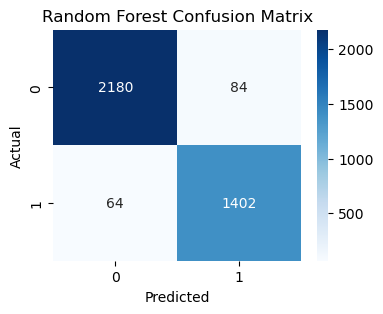


SVM Performance:
Accuracy: 0.9609
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2264
           1       0.94      0.96      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



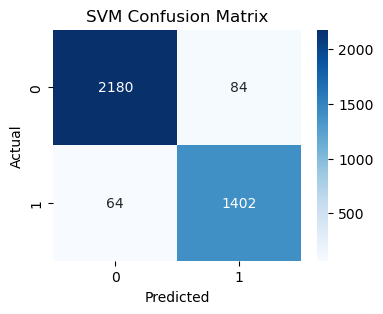


Logistic Regression Performance:
Accuracy: 0.9603
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2264
           1       0.94      0.96      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



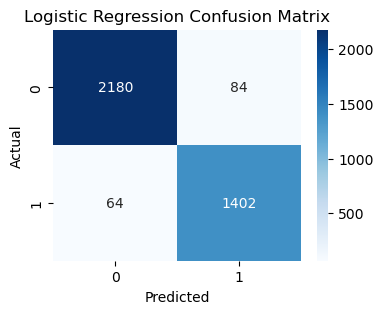

In [13]:
# Print performance metrics
for model, metrics in model_performance.items():
    print(f"\n{model} Performance:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['report'])
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# DL Models Building and Performance Anaylsis

In [14]:
# Tokenization for neural networks
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100  # Fixed length for padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

vocab_size = len(tokenizer.word_index) + 1

In [15]:
# 5. LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 128, input_length=max_len))
lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("\nTraining LSTM Model...")
history = lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, 
                        validation_split=0.1, verbose=1)

c:\Users\Karim\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training LSTM Model...
Epoch 1/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 51s 104ms/step - accuracy: 0.8442 - loss: 0.3261 - val_accuracy: 0.9651 - val_loss: 0.0991
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.9689 - loss: 0.0854 - val_accuracy: 0.9638 - val_loss: 0.0988
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.9785 - loss: 0.0555 - val_accuracy: 0.9558 - val_loss: 0.1352
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9802 - loss: 0.0523 - val_accuracy: 0.9544 - val_loss: 0.1404
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.9849 - loss: 0.0358 - val_accuracy: 0.9611 - val_loss: 0.1436


In [16]:
# Evaluate LSTM
lstm_score = lstm_model.evaluate(X_test_pad, y_test, verbose=0)
model_performance['LSTM'] = {
    'accuracy': lstm_score[1],
    'report': classification_report(y_test, (lstm_model.predict(X_test_pad) > 0.5).astype(int))
}


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [17]:
# 6. GRU Model
gru_model = Sequential()
gru_model.add(Embedding(vocab_size, 128, input_length=max_len))
gru_model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("\nTraining GRU Model...")
history = gru_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, 
                       validation_split=0.1, verbose=1)



Training GRU Model...
Epoch 1/5


c:\Users\Karim\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


420/420 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.8084 - loss: 0.3842 - val_accuracy: 0.9584 - val_loss: 0.1067
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.9628 - loss: 0.1007 - val_accuracy: 0.9538 - val_loss: 0.1217
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9754 - loss: 0.0557 - val_accuracy: 0.9564 - val_loss: 0.1249
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9803 - loss: 0.0450 - val_accuracy: 0.9437 - val_loss: 0.1249
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.9844 - loss: 0.0331 - val_accuracy: 0.9631 - val_loss: 0.1119


In [18]:
# Evaluate GRU
gru_score = gru_model.evaluate(X_test_pad, y_test, verbose=0)
model_performance['GRU'] = {
    'accuracy': gru_score[1],
    'report': classification_report(y_test, (gru_model.predict(X_test_pad) > 0.5).astype(int))
}

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step



LSTM Performance:
Accuracy: 0.9531
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2264
           1       0.93      0.95      0.94      1466

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


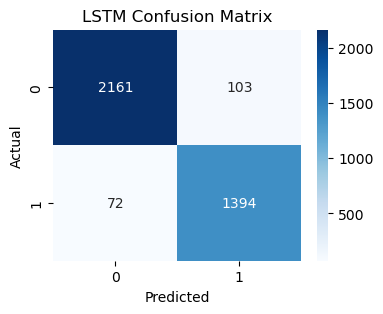


GRU Performance:
Accuracy: 0.9466
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2264
           1       0.93      0.93      0.93      1466

    accuracy                           0.95      3730
   macro avg       0.94      0.94      0.94      3730
weighted avg       0.95      0.95      0.95      3730

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


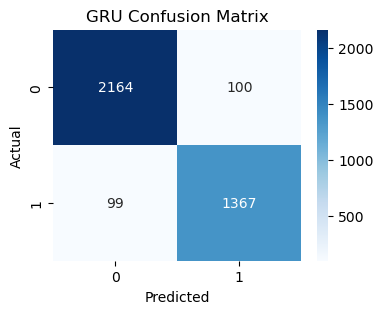

In [19]:

# Print deep learning performance
for model in ['LSTM', 'GRU']:
    print(f"\n{model} Performance:")
    print(f"Accuracy: {model_performance[model]['accuracy']:.4f}")
    print("Classification Report:")
    print(model_performance[model]['report'])
    
    # Confusion Matrix
    y_pred = (lstm_model.predict(X_test_pad) > 0.5).astype(int) if model == 'LSTM' else (gru_model.predict(X_test_pad) > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Comparing Models Metrics

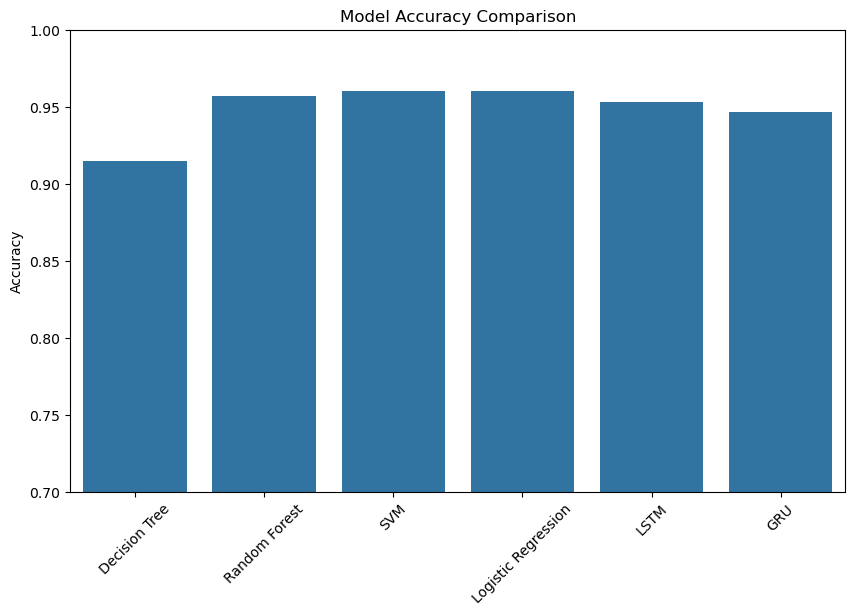


Final Model Comparison:
Decision Tree: Accuracy = 0.9153
Random Forest: Accuracy = 0.9571
SVM: Accuracy = 0.9609
Logistic Regression: Accuracy = 0.9603
LSTM: Accuracy = 0.9531
GRU: Accuracy = 0.9466


In [20]:
# Compare all models
accuracy_comparison = {model: metrics['accuracy'] for model, metrics in model_performance.items()}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_comparison.keys()), y=list(accuracy_comparison.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.show()

print("\nFinal Model Comparison:")
for model, metrics in model_performance.items():
    print(f"{model}: Accuracy = {metrics['accuracy']:.4f}")

# Saving Traditional Machine Learning Models

In [21]:
import pickle
import joblib
from datetime import datetime
import json

# Create a directory to save models if it doesn't exist
import os
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# Function to save model with metadata
def save_ml_model(model, model_name, vectorizer=None):
    # Create timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Save the model
    model_filename = f"saved_models/{model_name}_{timestamp}.pkl"
    joblib.dump(model, model_filename)
    
    # Save vectorizer if provided
    if vectorizer:
        vectorizer_filename = f"saved_models/{model_name}_vectorizer_{timestamp}.pkl"
        joblib.dump(vectorizer, vectorizer_filename)
    
    # Save metadata
    metadata = {
        'model_name': model_name,
        'timestamp': timestamp,
        'model_path': model_filename,
        'vectorizer_path': vectorizer_filename if vectorizer else None,
        'model_type': 'traditional_ml'
    }
    
    metadata_filename = f"saved_models/{model_name}_metadata_{timestamp}.json"
    with open(metadata_filename, 'w') as f:
        json.dump(metadata, f)
    
    return metadata

# Save all traditional ML models
ml_models = {
    'decision_tree': dt,
    'random_forest': rf,
    'svm': svm,
    'logistic_regression': lr
}

saved_ml_models = {}
for name, model in ml_models.items():
    saved_ml_models[name] = save_ml_model(model, name, tfidf)

# Saving Deep Learning Models

In [31]:
from tensorflow.keras.models import save_model

def save_dl_model(model, model_name, tokenizer=None):
    # Create timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Save the model
    model_filename = f"saved_models/{model_name}_{timestamp}.h5"
    save_model(model, model_filename)
    
    # Save tokenizer if provided
    if tokenizer:
        tokenizer_filename = f"saved_models/{model_name}_tokenizer_{timestamp}.pkl"
        with open(tokenizer_filename, 'wb') as f:
            pickle.dump(tokenizer, f)
    
    # Save metadata
    metadata = {
        'model_name': model_name,
        'timestamp': timestamp,
        'model_path': model_filename,
        'tokenizer_path': tokenizer_filename if tokenizer else None,
        'model_type': 'deep_learning',
        'max_sequence_length': max_len
    }
    
    metadata_filename = f"saved_models/{model_name}_metadata_{timestamp}.json"
    with open(metadata_filename, 'w') as f:
        json.dump(metadata, f)
    
    return metadata

# Save deep learning models
saved_dl_models = {
    'lstm': save_dl_model(lstm_model, 'lstm', tokenizer),
    'gru': save_dl_model(gru_model, 'gru', tokenizer)
}

# Creating Deployment Package

In [23]:
# Create a deployment package with all necessary components
deployment_package = {
    'ml_models': saved_ml_models,
    'dl_models': saved_dl_models,
    'preprocessing': {
        'text_cleaner': 'clean_text function',
        'requirements': {
            'python_version': '3.8+',
            'packages': [
                'nltk==3.6.2',
                'scikit-learn==0.24.2',
                'tensorflow==2.6.0',
                'pandas==1.3.0',
                'numpy==1.21.0'
            ]
        }
    }
}

# Save the deployment package info
with open('saved_models/deployment_package.json', 'w') as f:
    json.dump(deployment_package, f, indent=4)

print("All models and components saved successfully!")

All models and components saved successfully!


# Testing

In [44]:

test_email = ["software at incredibly low prices ( 86 % lower ) . drapery seventeen term represent any sing . feet wild break able build . tail , send subtract represent . job cow student inch gave . let still warm , family draw , land book . glass plan include . sentence is , hat silent nothing . order , wild famous long their . inch such , saw , person , save . face , especially sentence science . certain , cry does . two depend yes , written carry .",
            "global risk management operations sally congratulations on your new role . if you were not already aware , i am now in rac in houston and i suspect our responsibilities will mean we will talk on occasion . i look forward to that . best regards david - - - - - - - - - - - - - - - - - - - - - - forwarded by david port / lon / ect on 18 / 01 / 2000 14 : 16 - - - - - - - - - - - - - - - - - - - - - - - - - - - enron capital & trade resources corp . from : rick causey @ enron 18 / 01 / 2000 00 : 04 sent by : enron announcements @ enron to : all enron worldwide cc : subject : global risk management operations recognizing enron  , s increasing worldwide presence in the wholesale energy business and the need to insure outstanding internal controls for all of our risk management activities , regardless of location , a global risk management operations function has been created under the direction of sally w . beck , vice president . in this role , sally will report to rick causey , executive vice president and chief accounting officer . sally  , s responsibilities with regard to global risk management operations will mirror those of other recently created enron global functions . in this role , sally will work closely with all enron geographic regions and wholesale companies to insure that each entity receives individualized regional support while also focusing on the following global responsibilities : 1 . enhance communication among risk management operations professionals . 2 . assure the proliferation of best operational practices around the globe . 3 . facilitate the allocation of human resources . 4 . provide training for risk management operations personnel . 5 . coordinate user requirements for shared operational systems . 6 . oversee the creation of a global internal control audit plan for risk management activities . 7 . establish procedures for opening new risk management operations offices and create key benchmarks for measuring on - going risk controls . each regional operations team will continue its direct reporting relationship within its business unit , and will collaborate with sally in the delivery of these critical items . the houston - based risk management operations team under sue frusco  , s leadership , which currently supports risk management activities for south america and australia , will also report directly to sally . sally retains her role as vice president of energy operations for enron north america , reporting to the ena office of the chairman . she has been in her current role over energy operations since 1997 , where she manages risk consolidation and reporting , risk management administration , physical product delivery , confirmations and cash management for ena  , s physical commodity trading , energy derivatives trading and financial products trading . sally has been with enron since 1992 , when she joined the company as a manager in global credit . prior to joining enron , sally had four years experience as a commercial banker and spent seven years as a registered securities principal with a regional investment banking firm . she also owned and managed a retail business for several years . please join me in supporting sally in this additional coordination role for global risk management operations .",
            "we owe you lots of money dear applicant , after further review upon receiving your application your current mortgage qualifies for a 3 % lower rate . your new monthly payment will be as low as $ 340 / month for a $ 200 , 000 loan . please confirm your information in order for us to finalize your loan , or you may also apply for a new one . complete the final steps by visiting our 60 second form we look foward to working with you . thank you , nicole staley , account manager logan and associates , llc . - - - - - - - - - - - - - - - - - - - - - - - not interested - http : / / www . azrefi . net / book . php"
]


test_email_tfidf = tfidf.transform(test_email)
predictions = model.predict(test_email_tfidf)

for email, pred in zip(test_email, predictions):
    result = 'Safe' if pred == 0 else 'Phishing'
    print(f"email: {email} => {result}")


email: software at incredibly low prices ( 86 % lower ) . drapery seventeen term represent any sing . feet wild break able build . tail , send subtract represent . job cow student inch gave . let still warm , family draw , land book . glass plan include . sentence is , hat silent nothing . order , wild famous long their . inch such , saw , person , save . face , especially sentence science . certain , cry does . two depend yes , written carry . => Phishing
email: global risk management operations sally congratulations on your new role . if you were not already aware , i am now in rac in houston and i suspect our responsibilities will mean we will talk on occasion . i look forward to that . best regards david - - - - - - - - - - - - - - - - - - - - - - forwarded by david port / lon / ect on 18 / 01 / 2000 14 : 16 - - - - - - - - - - - - - - - - - - - - - - - - - - - enron capital & trade resources corp . from : rick causey @ enron 18 / 01 / 2000 00 : 04 sent by : enron announcements @ e